<a href="https://colab.research.google.com/github/RongBin713/Assignment/blob/main/Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A.

In [3]:
import pandas as pd

# Load the housing dataset
housing_data = pd.read_csv('/content/mas_housing.csv')

# Check for missing values
print("Missing values in housing_data:\n", housing_data.isnull().sum())

# Fill missing values for numeric columns only
housing_data.fillna(housing_data.select_dtypes(include='number').median(), inplace=True)

# Clean the 'Price' column (remove 'RM' and commas, then convert to float)
if 'Price' in housing_data.columns:
    housing_data['Price'] = (
        housing_data['Price']
        .str.replace('RM', '', regex=False)  # Remove 'RM'
        .str.replace(',', '', regex=False)   # Remove commas
        .astype(float)                       # Convert to float
    )

# Handle non-numeric columns (if 'house_price' is present and needs conversion)
if 'house_price' in housing_data.columns:
    housing_data['house_price'] = (
        housing_data['house_price']
        .str.replace('RM', '', regex=False)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# Display the dataset after handling missing values
print("\nHousing Data after handling missing values:\n", housing_data.head())

# Display data types for validation
print("\nData types in housing_data after cleaning:\n", housing_data.dtypes)

Missing values in housing_data:
 Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

Housing Data after handling missing values:
                           Location      Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  1250000.0   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  6800000.0     6        7.0        2.0   
2            Dutamas, Kuala Lumpur  1030000.0     3        4.0        2.0   
3             Cheras, Kuala Lumpur        NaN   NaN        2.0        2.0   
4        Bukit Jalil, Kuala Lumpur   900000.0   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  

B.


Summary statistics of the dataset:
              Price     Bathrooms     Car Parks
count  5.363500e+04  53883.000000  53883.000000
mean   2.091947e+06      3.033331      2.005289
std    1.384014e+07      1.613216      1.075812
min    1.000000e+01      1.000000      1.000000
25%    5.800000e+05      2.000000      1.000000
50%    9.900000e+05      2.000000      2.000000
75%    1.996400e+06      4.000000      2.000000
max    1.980000e+09     20.000000     30.000000


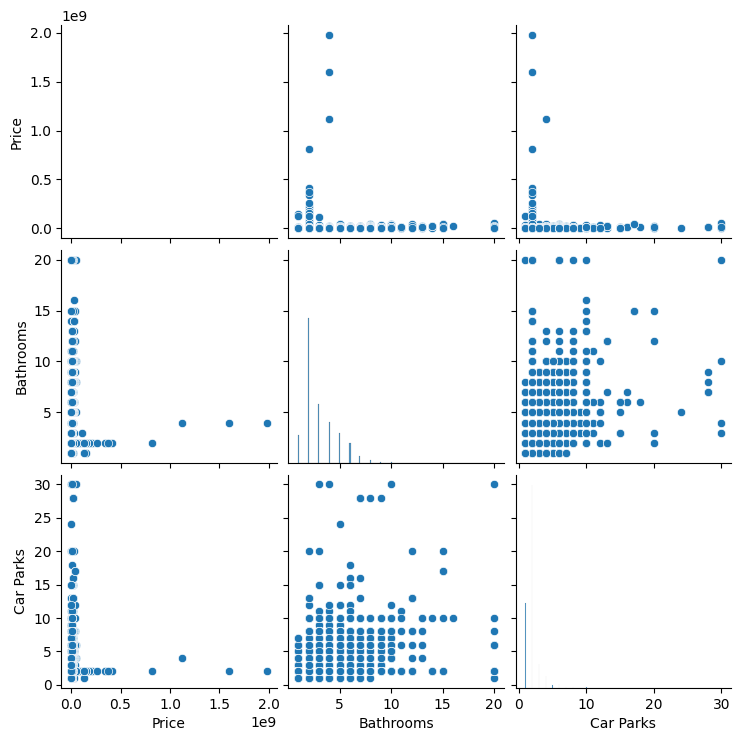

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(housing_data.describe())

# Distribution of house prices (if applicable)
if 'house_price' in housing_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(housing_data['house_price'], kde=True, bins=30)
    plt.title('Distribution of House Prices')
    plt.xlabel('House Price (RM)')
    plt.ylabel('Frequency')
    plt.show()

# Relationship between house price and house type (if columns exist)
if 'house_price' in housing_data.columns and 'house_type' in housing_data.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=housing_data, x='house_type', y='house_price')
    plt.xticks(rotation=45)
    plt.title('House Price Distribution by House Type')
    plt.xlabel('House Type')
    plt.ylabel('House Price (RM)')
    plt.show()

# Pairplot for numerical features
numerical_features = housing_data.select_dtypes(include='number').columns
sns.pairplot(housing_data[numerical_features])
plt.show()

C.

In [6]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to extract numeric values from a string
def extract_numeric(value):
    if isinstance(value, str):
        # Extract all numeric parts (including decimals and commas)
        numbers = re.findall(r'\d+,?\d*', value)
        if numbers:
            # Sum all extracted numbers (e.g., '2+1' -> 3)
            return sum(float(num.replace(',', '')) for num in numbers)
    return float('nan')  # Return NaN if no numeric value is found

# Step 1: Clean the Numeric Columns
# Clean the 'Rooms' column (e.g., '2+1' -> 3)
housing_data['Rooms'] = housing_data['Rooms'].apply(extract_numeric)

# Clean the 'Bathrooms' column (if it contains non-numeric values)
housing_data['Bathrooms'] = housing_data['Bathrooms'].apply(extract_numeric)

# Clean the 'Car Parks' column (if it contains non-numeric values)
housing_data['Car Parks'] = housing_data['Car Parks'].apply(extract_numeric)

# Clean the 'Size' column (e.g., 'Built-up : 1,335 sq. ft.' -> 1335)
housing_data['Size'] = housing_data['Size'].apply(extract_numeric)

# Step 2: Handle Missing Values
# Fill missing values in numeric columns
housing_data.fillna(housing_data.select_dtypes(include='number').median(), inplace=True)

# Check if 'Affordable' column exists
if 'Affordable' not in housing_data.columns:
    # Create 'Affordable' column based on some criteria (example)
    housing_data['Affordable'] = (housing_data['Price'] < 500000).astype(int)

# Step 3: Define Features and Target Variable
# Define features and target variable
X = housing_data[['Rooms', 'Bathrooms', 'Car Parks', 'Size']]  # Features
y = housing_data['Affordable']  # Target variable

# Step 4: Split the Data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build a Decision Tree Classifier
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Step 6: Build a Random Forest Classifier
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

D.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Decision Tree Classifier:
Accuracy: 0.82
Confusion Matrix:
[[8831    0]
 [1946    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      8831
           1       0.00      0.00      0.00      1946

    accuracy                           0.82     10777
   macro avg       0.41      0.50      0.45     10777
weighted avg       0.67      0.82      0.74     10777


Random Forest Classifier:
Accuracy: 0.82
Confusion Matrix:
[[8831    0]
 [1946    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      8831
           1       0.00      0.00      0.00      1946

    accuracy                           0.82     10777
   macro avg       0.41      0.50      0.45     10777
weighted avg       0.67      0.82      0.74     10777



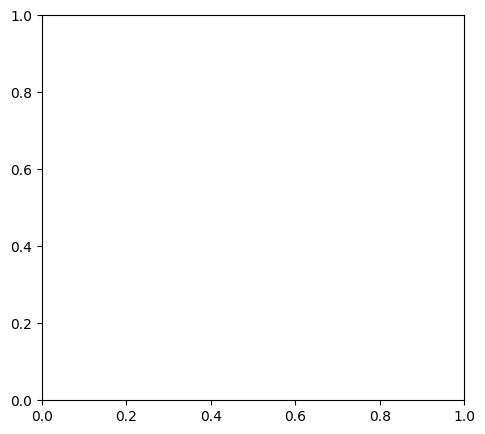

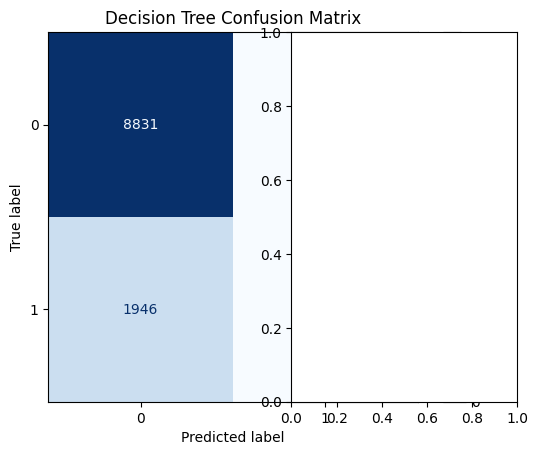

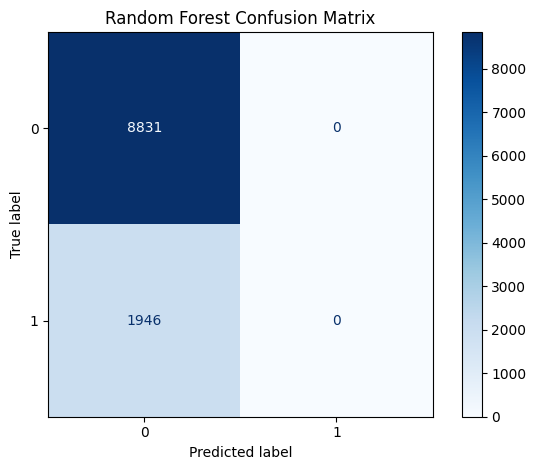


Model Comparison:
Decision Tree Accuracy: 0.82
Random Forest Accuracy: 0.82

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      8831
           1       0.00      0.00      0.00      1946

    accuracy                           0.82     10777
   macro avg       0.41      0.50      0.45     10777
weighted avg       0.67      0.82      0.74     10777


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      8831
           1       0.00      0.00      0.00      1946

    accuracy                           0.82     10777
   macro avg       0.41      0.50      0.45     10777
weighted avg       0.67      0.82      0.74     10777



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

# Print results for Decision Tree
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("Classification Report:")
print(dt_class_report)

# Print results for Random Forest
print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("Classification Report:")
print(rf_class_report)

# Visualize Confusion Matrices
plt.figure(figsize=(12, 5))

# Confusion Matrix for Decision Tree
plt.subplot(1, 2, 1)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix, display_labels=dt_classifier.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')

# Confusion Matrix for Random Forest
plt.subplot(1, 2, 2)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=rf_classifier.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

# Compare the performance of the two models
print("\nModel Comparison:")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Compare classification reports
print("\nDecision Tree Classification Report:")
print(dt_class_report)
print("\nRandom Forest Classification Report:")
print(rf_class_report)